### Student Information
Name: 蘇立光

Student ID: 110000162

GitHub ID: 92088440

Kaggle name: Emperor Augusto

Kaggle private scoreboard snapshot: 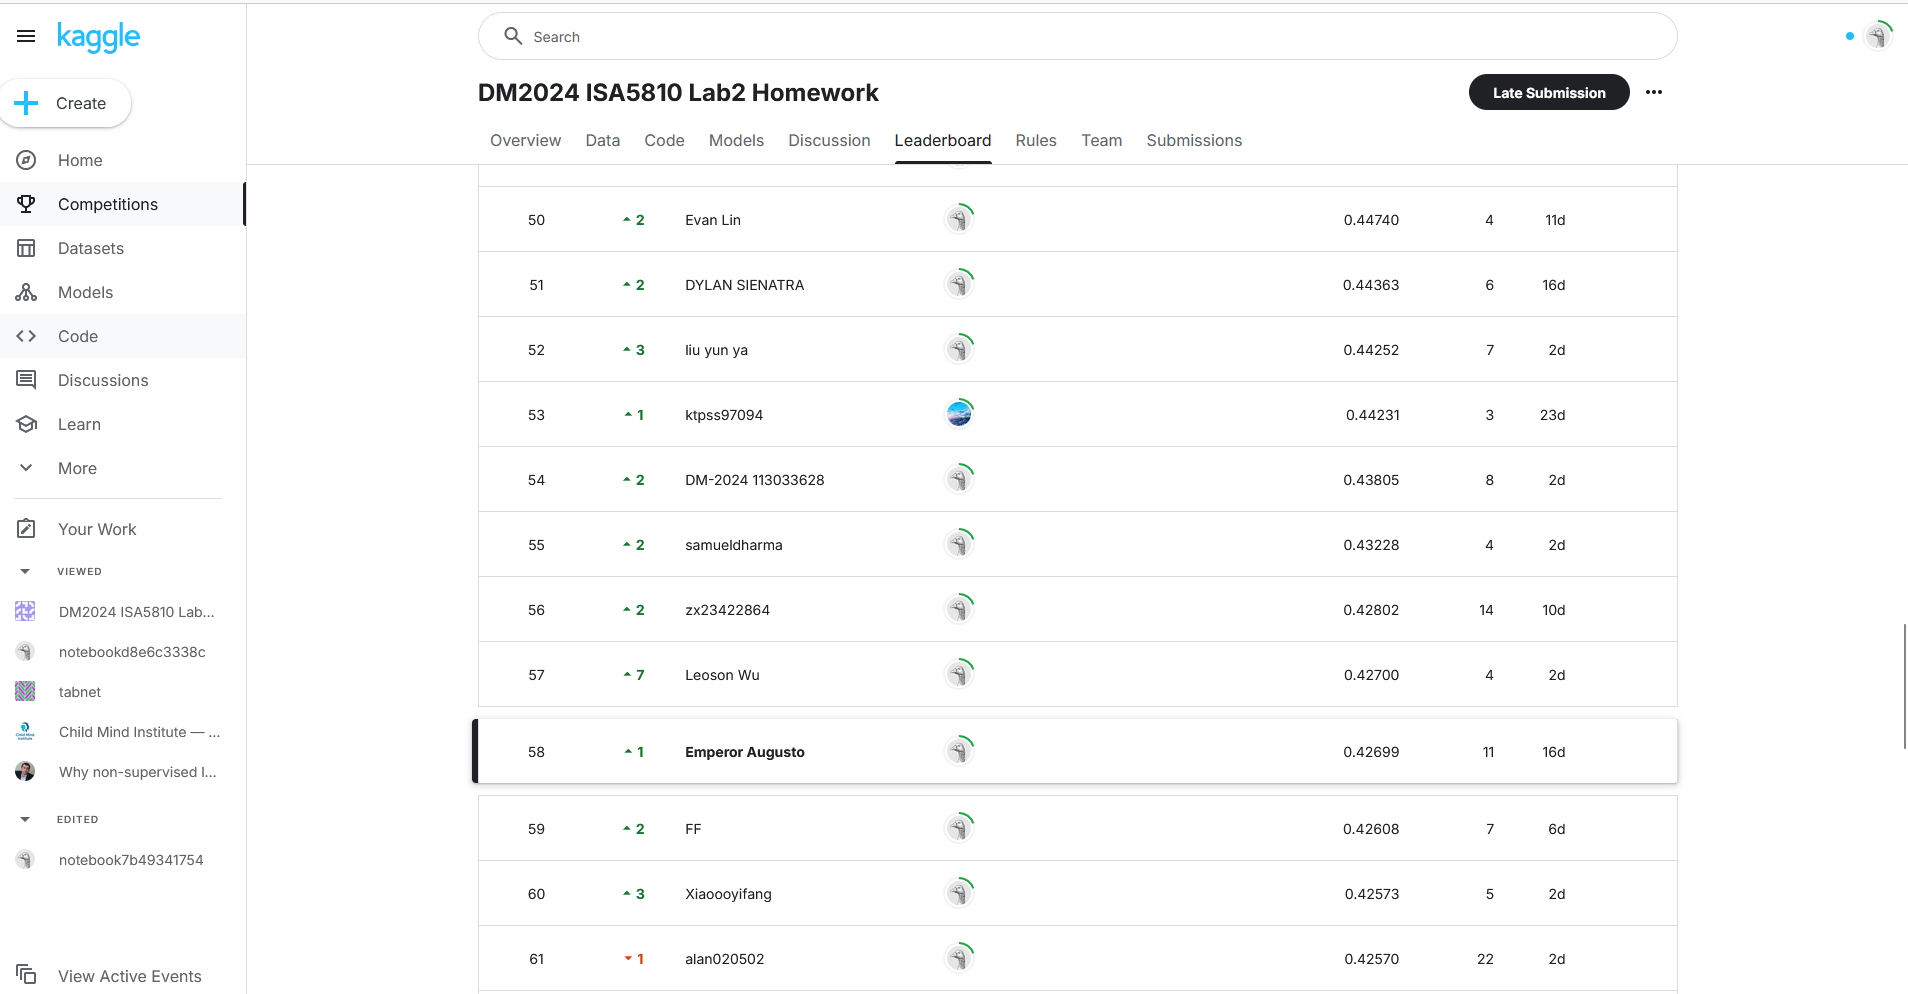

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

## Initial fetch and data preprocessing

### Fetch data

In [2]:
import pandas as pd
import numpy as np

tweets_file = "tweets_DM.json"
emotion_file = "emotion.csv"
data_identification_file = "data_identification.csv"

tweets_df = pd.read_json(tweets_file, lines=True)
emotion_df = pd.read_csv(emotion_file)
data_identification_df = pd.read_csv(data_identification_file)

In [3]:
tweets_df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


### Extract and merge the data

In [4]:
# Extract data from `_source` column
tweets_df['tweet_id'] = tweets_df['_source'].apply(lambda x: x['tweet']['tweet_id'])
tweets_df['text'] = tweets_df['_source'].apply(lambda x: x['tweet']['text'])
tweets_df['hashtags'] = tweets_df['_source'].apply(lambda x: x['tweet'].get('hashtags', []))

# And merge the data with emotion_df and data_identification_df
merged_df = tweets_df.merge(emotion_df, on="tweet_id", how="left")
merged_df = merged_df.merge(data_identification_df, on="tweet_id", how="left")

In [5]:
merged_df

,_score,_index,_source,_crawldate,_type,tweet_id,text,hashtags,emotion,identification
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation,train
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness,train
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],NaN,test
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear,train
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,0x2de201,"""Trust is not the same as faith. A friend is s...",[],NaN,test
...,...,...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",NaN,test
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,0x29d0cb,I swear all this hard work gone pay off one da...,[],NaN,test
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[],NaN,test
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],joy,train


In [6]:
pd.set_option('display.max_colwidth', None)
print(merged_df['text'].iloc[1])
print(merged_df['emotion'].iloc[1])

@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN
sadness


### Fetch training and testing data

In [7]:
# Separate training and testing data defined in data_identification_df
train_df = merged_df[merged_df['identification'] == 'train'].copy()
test_df = merged_df[merged_df['identification'] == 'test'].copy()

In [8]:
# Check content
print("\nTraining Data Sample:")
print(train_df.head())

print("\nTesting Data Sample:")
print(test_df.head())


Training Data Sample:
   _score          _index  \
0     391  hashtag_tweets   
1     433  hashtag_tweets   
3     376  hashtag_tweets   
5     120  hashtag_tweets   
6    1021  hashtag_tweets   

                                                                                                                                                                                                                  _source  \
0                                                              {'tweet': {'hashtags': ['Snapchat'], 'tweet_id': '0x376b20', 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that's <LH>'}}   
1          {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'], 'tweet_id': '0x2d5350', 'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}}   
3                                                                                                                      {'tweet': {'hashtags

In [9]:
# Check shape
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)

# Check for NaN value(s) in training
print("\nMissing Values in Training Data:")
print(train_df['emotion'].isnull().sum())

# Check for NaN value(s) in testing
print("\nMissing Values in Testing Data:")
print(test_df['emotion'].isnull().sum())

Training Data Shape: (1455563, 10)
Testing Data Shape: (411972, 10)

Missing Values in Training Data:
0

Missing Values in Testing Data:
411972


### Data Analysis

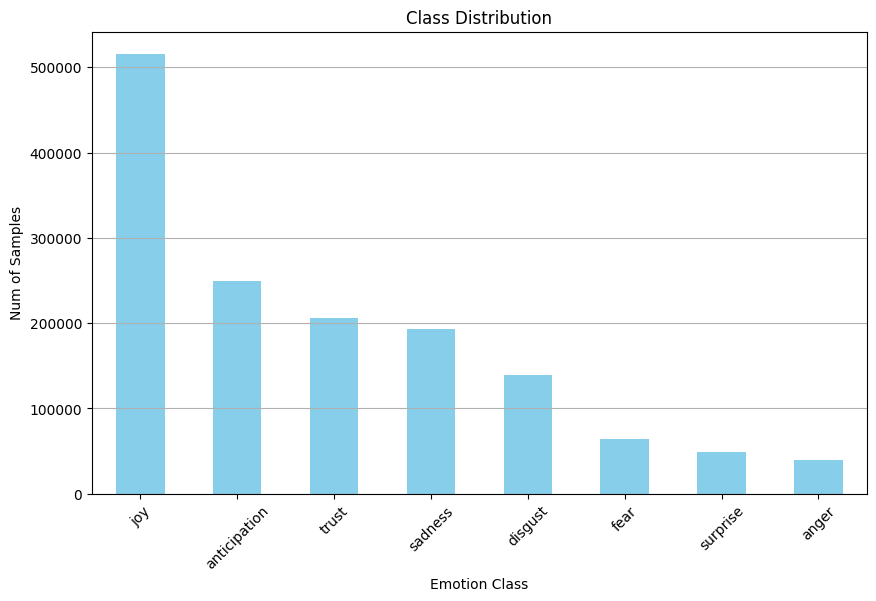

Class Counts:
emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

Occurance Rate:
emotion
joy             0.354514
anticipation    0.171023
trust           0.141167
sadness         0.132895
disgust         0.095565
fear            0.043969
surprise        0.033478
anger           0.027389
Name: count, dtype: float64


In [10]:
import matplotlib.pyplot as plt

class_counts = train_df['emotion'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Emotion Class')
plt.ylabel('Num of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Class Counts:")
print(class_counts)

print("\nOccurance Rate:")
print(class_counts / len(train_df))

## Encoding and model run

### TF-IDF Vectorizer

In [11]:
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Preprocessing function
def preprocess_text(text):
    # Remove links, URLS, etc.
    text = re.sub(r"http\S+|www\S+", '', text) 
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    return text.lower()

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

# Do TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2), tokenizer=nltk.word_tokenize)
tfidf.fit(train_df['text'])

# Transform the data using TF-IDF
X_train = tfidf.transform(train_df['text'])
y_train = train_df['emotion']

X_test = tfidf.transform(test_df['text'])
y_test = test_df['emotion']

C:\Users\CHRISTIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# Check shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 10000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 10000)
y_test.shape:  (411972,)


### Label encoding

In [13]:
## deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
#y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
3            fear
5             joy
Name: emotion, dtype: object

y_train.shape:  (1455563,)
y_test.shape:  (411972,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)
y_test.shape:  (411972,)


### Split training data

In [14]:
from sklearn.model_selection import train_test_split

# Since the test data classification is empty
# Split training data into 80% acuracy and 20% validation

X_t, X_val, y_t, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.1, 
    random_state=42, 
    stratify=y_train
)
print("X_train.shape: ", X_t.shape)
print("y_train.shape: ", y_t.shape)
print("X_val.shape: ", X_val.shape)
print("y_val.shape: ", y_val.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (1310006, 10000)
y_train.shape:  (1310006, 8)
X_val.shape:  (145557, 10000)
y_val.shape:  (145557, 8)
X_test.shape:  (411972, 10000)


In [15]:
# I/O check
input_shape = X_t.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  10000
output_shape:  8


### Define model

In [16]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Softmax, LeakyReLU
from keras.regularizers import l2
from keras.optimizers import SGD

# Using the DNN from the master code

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=256)(X)  # 64
H1 = BatchNormalization()(X_W1)
H1 = LeakyReLU(alpha=0.01)(H1)
H1 = Dropout(0.5)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=256)(H1)  # 64
H2 = BatchNormalization()(H1_W2)
H2 = LeakyReLU(alpha=0.01)(H2)
H2 = Dropout(0.5)(H2)

# 3rd hidden layer
H2_W3 = Dense(units=256)(H2)  # 64
H3 = BatchNormalization()(H2_W3)
H3 = LeakyReLU(alpha=0.01)(H3)
H3 = Dropout(0.5)(H3)

# output layer
H4_W5 = Dense(units=output_shape)(H3)  # 4
H5 = Softmax()(H4_W5)

model_output = H5

# create model
model = Model(inputs=[model_input], outputs=[model_output])

sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

# loss function & optimizer
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

C:\Users\CHRISTIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10000)           │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)             │     2,560,256 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)             │         1,024 │
│ (BatchNormalization)            │                         │               │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)             │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)             │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)             │        65,792 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)             │         1,024 │
│ (BatchNormalization)            │                         │               │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)             │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)             │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)             │        65,792 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)             │         1,024 │
│ (BatchNormalization)            │                         │               │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)             │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)             │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)               │         2,056 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 8)               │             0 │
└─────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 2,696,968 (10.29 MB)

 Trainable params: 2,695,432 (10.28 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [17]:
from keras.callbacks import CSVLogger


# Training settings
csv_logger = CSVLogger('training_log.csv')
epochs = 15
batch_size = 128

# Train the model with class weights
history = model.fit(
    X_t,
    y_t,
    epochs=epochs, 
    batch_size=batch_size, 
    callbacks=[csv_logger],
    validation_data=(X_val, y_val)
)

print('Training complete!')

Epoch 1/15


C:\Users\CHRISTIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


10235/10235 ━━━━━━━━━━━━━━━━━━━━ 111s 11ms/step - accuracy: 0.4654 - loss: 1.4940 - val_accuracy: 0.5374 - val_loss: 1.2851
Epoch 2/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 108s 11ms/step - accuracy: 0.5340 - loss: 1.2997 - val_accuracy: 0.5421 - val_loss: 1.2667
Epoch 3/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 107s 10ms/step - accuracy: 0.5470 - loss: 1.2621 - val_accuracy: 0.5458 - val_loss: 1.2569
Epoch 4/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 106s 10ms/step - accuracy: 0.5565 - loss: 1.2355 - val_accuracy: 0.5483 - val_loss: 1.2516
Epoch 5/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 105s 10ms/step - accuracy: 0.5646 - loss: 1.2133 - val_accuracy: 0.5483 - val_loss: 1.2506
Epoch 6/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 106s 10ms/step - accuracy: 0.5717 - loss: 1.1942 - val_accuracy: 0.5496 - val_loss: 1.2497
Epoch 7/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 105s 10ms/step - accuracy: 0.5773 - loss: 1.1807 - val_accuracy: 0.5498 - val_loss: 1.2490
Epoch 8/15
10235/10235 ━━━━━━━━━━━━━━━━━━━━ 112s 11ms/step - accur

### Predict on test data

In [18]:
## predict
from sklearn.metrics import accuracy_score
pred_result = model.predict(X_test, batch_size=128)

#print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
pred_labels = np.argmax(pred_result, axis=1)

# Decode the class indices to their string labels
pred_emotions = label_encoder.inverse_transform(pred_labels)

# Step 3: Update the test_df with predictions
test_df['emotion'] = pred_emotions

# Step 4: Prepare the submission file
submission_df = test_df[['tweet_id', 'emotion']]
submission_df.columns = ['id', 'emotion']  # Rename to match submission format
submission_file = "submission.csv"

# Save to CSV
submission_df.to_csv(submission_file, index=False)

print(f"Submission file created: {submission_file}")

3219/3219 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step
Submission file created: submission.csv
